In [6]:
import pandas as pd
import json
import re
import numpy as np
from typing import List, Optional, Dict, Any
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from helper_functions_testing import retrieve_results_nosave

In [19]:
verified_classified = pd.read_csv('Qwen3_4B_verified_test.csv')
verified_classified

,Unnamed: 0.1,Unnamed: 0,request,gold_judgment,direct_source,category,reasoning,original_annotation,thinking,model_response,model_pred
0,0,1118,When was the first world war broke out?,underspecified,AmbigNQ,Undetermined perspective or granularity,The phrase “broke out” can be interpreted from...,"{""annotations"": [{""type"": ""multipleQAs"", ""qaPa...","<think>\nOkay, let's see. The user is asking, ...","{\n ""query"": ""When was the first world war br...",fully specified
1,1,5585,Who sings the song i will try to fix you?,underspecified,AmbigNQ,Undetermined perspective or granularity,The question allows multiple granularities: it...,"{""annotations"": [{""type"": ""multipleQAs"", ""qaPa...","<think>\nOkay, let's see. The user is asking, ...","{\n ""query"": ""Who sings the song i will try t...",underspecified
2,2,9330,Who is the head of the nation in india?,underspecified,AmbigNQ,Undetermined perspective or granularity,The question can refer to the role or title of...,"{""annotations"": [{""type"": ""multipleQAs"", ""qaPa...","<think>\nOkay, let's see. The user is asking, ...","{\n ""query"": ""Who is the head of the nation i...",fully specified
3,3,9602,Moss is an example of which type of plant?,underspecified,AmbigNQ,Undetermined perspective or granularity,The term “type” can refer to different taxonom...,"{""annotations"": [{""type"": ""multipleQAs"", ""qaPa...","<think>\nOkay, let's tackle this query. The us...","{\n ""query"": ""Moss is an example of which typ...",fully specified
4,4,4145,How long can you serve in the house?,underspecified,AmbigNQ,"Undetermined lexicons or references, Undetermi...",The term “house” is referentially ambiguous be...,"{""annotations"": [{""type"": ""multipleQAs"", ""qaPa...","<think>\nOkay, let's see. The user asked, ""How...","{\n ""query"": ""How long can you serve in the h...",underspecified
...,...,...,...,...,...,...,...,...,...,...,...
145,145,1213,Give me a bulleted list of the 5 highest mount...,fully specified,CLAMBER,fully specified,This question is fully specified because it re...,NaN,"<think>\nOkay, let's see. The user wants a bul...","{\n ""query"": ""Give me a bulleted list of the ...",fully specified
146,146,2274,Who is the author of the novel Taipei by Tao Lin?,fully specified,CLAMBER,fully specified,This question is fully specified because it as...,NaN,"<think>\nOkay, let's see. The user is asking, ...","{\n ""query"": ""Who is the author of the novel ...",fully specified
147,147,356,What's the average body length of Brania russe...,fully specified,CLAMBER,fully specified,This question is fully specified because it as...,NaN,"<think>\nOkay, let me try to figure out if thi...","{\n ""query"": ""What's the average body length ...",fully specified
148,148,294,Is Bolusia capensis a unicellular organism in ...,fully specified,CLAMBER,fully specified,This question is fully specified because it as...,NaN,"<think>\nOkay, let's see. The user is asking i...","{\n ""query"": ""Is Bolusia capensis a unicellul...",fully specified


In [35]:
# Transform strings containing multiple categories into lists
verified_classified["category_list"] = verified_classified["category"].str.split(r",\s*")

# The set of unique categories
raw_list = verified_classified["category_list"].to_list()
all_categories = list(set([category for annotation in raw_list for category in annotation])) # 大循环在左，小循环在右

In [40]:
cat_dfs = {cat: verified_classified[verified_classified['category_list'].apply(lambda x: cat in x)] for cat in all_categories}

Performance on Missing necessary components:
No error found, directly process the data.
                 precision    recall  f1-score   support

fully specified       0.00      0.00      0.00         0
 underspecified       1.00      0.88      0.93        16

       accuracy                           0.88        16
      macro avg       0.50      0.44      0.47        16
   weighted avg       1.00      0.88      0.93        16

Performance on Undetermined standard or preference:
No error found, directly process the data.
                 precision    recall  f1-score   support

fully specified       0.00      0.00      0.00         0
 underspecified       1.00      0.88      0.94        34

       accuracy                           0.88        34
      macro avg       0.50      0.44      0.47        34
   weighted avg       1.00      0.88      0.94        34

Performance on Undetermined lexicons or references:
No error found, directly process the data.
                 precision    re

/home/yhuang/ondemand/paper_clean/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/yhuang/ondemand/paper_clean/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/yhuang/ondemand/paper_clean/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize

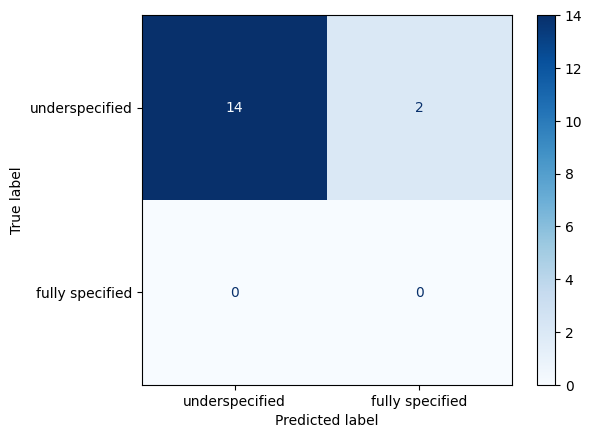

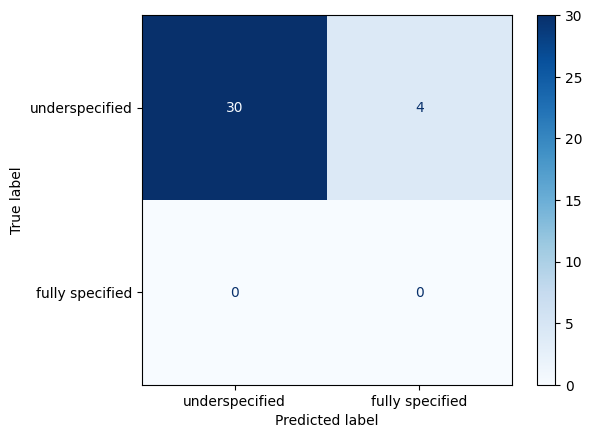

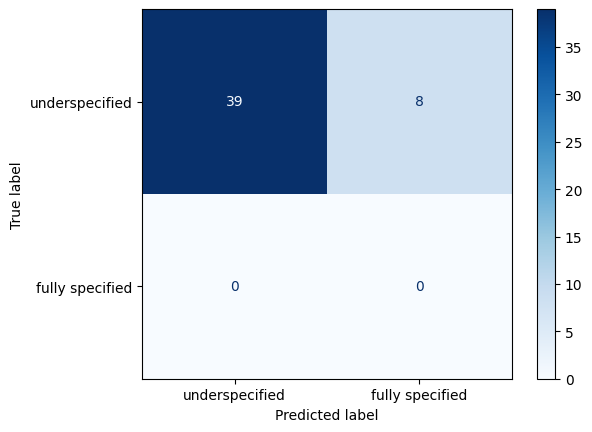

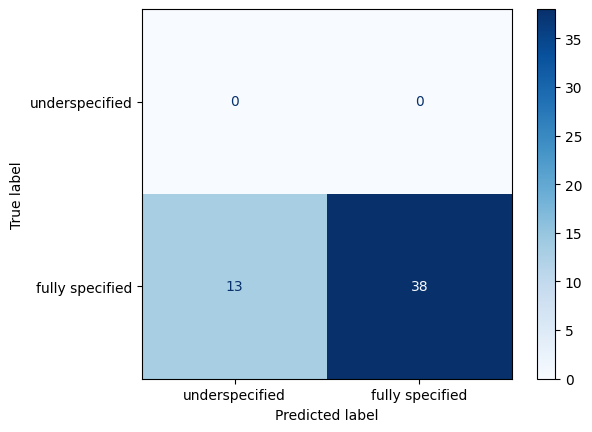

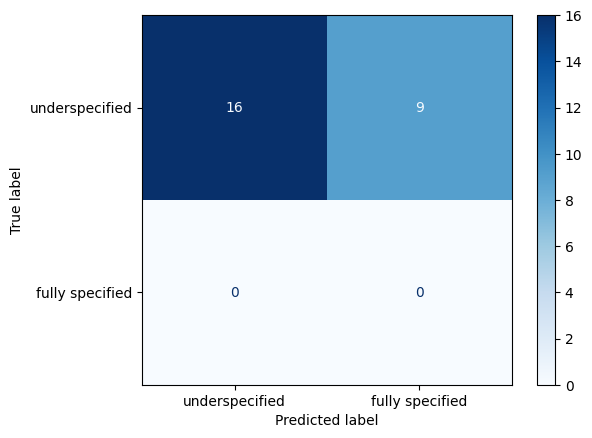

In [42]:
for category in all_categories:
    print(f"Performance on {category}:")
    retrieve_results_nosave(cat_dfs[category])